https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import *
from sklearn.preprocessing import *


In [180]:
label = ['feat_{}'.format(i) for i in range(73)]
df = pd.read_csv('eighthr.data', names=label)
df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72
1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15,19.1,12.5,6.7,0.11,3.83,0.14,1612,-2.3,0.3,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3,2.6,3,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16,16.2,22.4,17.8,9,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.3,3172,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22,22.1,22.2,21.3,19.8,18.6,18,18,18.2,18.3,18.4,22.2,18.7,9,0.56,0.89,10.17,1568.5,0.9,0.54,3.8,4.42,3160,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19,19,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2,3,3,3.1,3.1,2.7,3,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26,25.6,24.2,22.9,21.6,20,19.5,19.1,19.1,26,21.1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,2.8,2.8,2.8,3.4,3.9,3.8,3.5,2,1.7,1.5,1.3,1.3,1.3,1.1,3.9,1.6,2.8,2.3,1.6,1.2,1.3,1.3,1.2,1.1,3.8,7.6,10.7,12.6,13.9,14.5,14.7,14.8,14.2,12.9,11.3,9.9,8.8,7.9,7.3,7,14.8,7.7,5.5,0.33,-2.25,-1.92,1576,3.2,0.06,0.01,-3.5,3153.5,-12.4,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,4.2,4.6,4.2,4.8,5,4.7,3.7,3.6,2.7,3.1,2.1,1.8,1.6,1.1,5,2.6,7,6.9,7.1,7.6,7.7,7.7,7.7,7.8,9.4,12.4,15.5,17.3,17.9,18.4,18.3,17.6,16.9,15.8,15.4,15.1,15,14.8,15.1,15.3,18.4,12.9,5.8,0.27,-2.45,4.71,1600.5,3.4,0.1,0.97,1.86,3189,-12,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,2.9,3.3,3.7,3.9,3.6,3.7,3.3,3,2.3,1.3,1.2,0.8,1.6,1.8,3.9,1.9,15.3,14.8,15,14.8,14.2,14.2,14.9,15.6,17.1,18.6,19.2,19.8,20.4,20.6,19.9,20.6,20,18.9,18.2,18.1,18.5,18.7,18.4,18.2,20.6,17.7,7.5,0.79,7.57,3.13,1591,4.6,0.06,3.02,2.24,3181,-11.8,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,2,2.5,2.1,2.5,3.6,3.9,4,3.6,3.1,3.2,2.3,1.8,1.7,1.4,1.3,4,2.1,18.1,18,18,18.3,18.3,18.4,18.4,18.4,18.9,18.8,18.9,20.1,21.9,23.3,23.6,23.5,22.6,21.8,21.1,20.4,19.8,19.5,19.1,18.7,23.6,19.9,9.3,0.66,0.85,9.76,1581.5,6.7,0.02,1.1,3.4,3170.5,-10.8,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2534 entries, 1/1/1998 to 12/31/2004
Data columns (total 73 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_0   2534 non-null   object 
 1   feat_1   2534 non-null   object 
 2   feat_2   2534 non-null   object 
 3   feat_3   2534 non-null   object 
 4   feat_4   2534 non-null   object 
 5   feat_5   2534 non-null   object 
 6   feat_6   2534 non-null   object 
 7   feat_7   2534 non-null   object 
 8   feat_8   2534 non-null   object 
 9   feat_9   2534 non-null   object 
 10  feat_10  2534 non-null   object 
 11  feat_11  2534 non-null   object 
 12  feat_12  2534 non-null   object 
 13  feat_13  2534 non-null   object 
 14  feat_14  2534 non-null   object 
 15  feat_15  2534 non-null   object 
 16  feat_16  2534 non-null   object 
 17  feat_17  2534 non-null   object 
 18  feat_18  2534 non-null   object 
 19  feat_19  2534 non-null   object 
 20  feat_20  2534 non-null   object 
 21  feat_2

In [182]:
set(df['feat_0'].values)

{'0',
 '0.1',
 '0.2',
 '0.3',
 '0.4',
 '0.5',
 '0.6',
 '0.7',
 '0.8',
 '0.9',
 '1',
 '1.1',
 '1.2',
 '1.3',
 '1.4',
 '1.5',
 '1.6',
 '1.7',
 '1.8',
 '1.9',
 '2',
 '2.1',
 '2.2',
 '2.3',
 '2.4',
 '2.5',
 '2.6',
 '2.7',
 '2.8',
 '2.9',
 '3',
 '3.1',
 '3.2',
 '3.3',
 '3.4',
 '3.5',
 '3.6',
 '3.7',
 '3.8',
 '3.9',
 '4',
 '4.1',
 '4.2',
 '4.3',
 '4.4',
 '4.5',
 '4.6',
 '4.7',
 '4.8',
 '4.9',
 '5',
 '5.1',
 '5.2',
 '5.3',
 '5.4',
 '5.5',
 '5.6',
 '5.7',
 '5.8',
 '5.9',
 '6',
 '6.1',
 '6.2',
 '6.3',
 '6.5',
 '6.7',
 '6.9',
 '7.5',
 '?'}

In [0]:
# ? 를 none 값으로 만들기
def find_nan(x):
    if x == '?':
        x = None
    return x
for name in df.columns:
    df[name] = df[name].apply(find_nan)

In [184]:
#none 값이 생김
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2534 entries, 1/1/1998 to 12/31/2004
Data columns (total 73 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_0   2235 non-null   object 
 1   feat_1   2242 non-null   object 
 2   feat_2   2240 non-null   object 
 3   feat_3   2242 non-null   object 
 4   feat_4   2241 non-null   object 
 5   feat_5   2242 non-null   object 
 6   feat_6   2243 non-null   object 
 7   feat_7   2245 non-null   object 
 8   feat_8   2244 non-null   object 
 9   feat_9   2247 non-null   object 
 10  feat_10  2246 non-null   object 
 11  feat_11  2242 non-null   object 
 12  feat_12  2247 non-null   object 
 13  feat_13  2246 non-null   object 
 14  feat_14  2246 non-null   object 
 15  feat_15  2248 non-null   object 
 16  feat_16  2250 non-null   object 
 17  feat_17  2251 non-null   object 
 18  feat_18  2248 non-null   object 
 19  feat_19  2242 non-null   object 
 20  feat_20  2240 non-null   object 
 21  feat_2

In [0]:
# df=df.fillna(method='ffill') 
df = df.dropna()
# df=df.interpolate(method='linear', limit_direction='forward')

In [186]:
df=df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1847 entries, 1/1/1998 to 12/31/2004
Data columns (total 73 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_0   1847 non-null   float64
 1   feat_1   1847 non-null   float64
 2   feat_2   1847 non-null   float64
 3   feat_3   1847 non-null   float64
 4   feat_4   1847 non-null   float64
 5   feat_5   1847 non-null   float64
 6   feat_6   1847 non-null   float64
 7   feat_7   1847 non-null   float64
 8   feat_8   1847 non-null   float64
 9   feat_9   1847 non-null   float64
 10  feat_10  1847 non-null   float64
 11  feat_11  1847 non-null   float64
 12  feat_12  1847 non-null   float64
 13  feat_13  1847 non-null   float64
 14  feat_14  1847 non-null   float64
 15  feat_15  1847 non-null   float64
 16  feat_16  1847 non-null   float64
 17  feat_17  1847 non-null   float64
 18  feat_18  1847 non-null   float64
 19  feat_19  1847 non-null   float64
 20  feat_20  1847 non-null   float64
 21  feat_2

## Create model

- 과거 10개의 데이터를 이용해서 데이터를 예측
- 전체 데이터 중 100개를 검증용 데이터로 활용

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, GRU, Input
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [0]:
## 당일 주가를 예측하기 위해 필요한 과거 일수
window_size = 10  #window_size, kernel, sequence, lookback
epochs = 10

In [189]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72
1/1/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15.0,19.1,12.5,6.7,0.11,3.83,0.14,1612.0,-2.3,0.30,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.10,17.90,10330,-55,0.00,0.0
1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3.0,2.6,3.0,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16.0,16.2,22.4,17.8,9.0,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.30,3172.0,-14.5,0.48,8.39,3.84,5805,14.05,29.00,10275,-55,0.00,0.0
1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4.0,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22.0,22.1,22.2,21.3,19.8,18.6,18.0,18.0,18.2,18.3,18.4,22.2,18.7,9.0,0.56,0.89,10.17,1568.5,0.9,0.54,3.80,4.42,3160.0,-15.9,0.60,6.94,9.80,5790,17.90,41.30,10235,-40,0.00,0.0
1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19.0,19.0,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3.0,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.70,10195,-40,2.08,0.0
1/7/1998,3.7,3.2,3.8,5.1,6.0,7.0,6.3,6.4,6.3,5.4,6.1,6.4,6.1,5.8,6.2,6.2,5.5,4.8,5.5,6.1,5.0,3.1,2.2,1.6,7.0,5.2,15.6,15.6,15.5,15.8,14.7,12.0,10.4,9.0,8.1,8.4,8.8,8.8,8.7,8.6,8.3,8.2,7.8,7.7,7.4,7.3,7.3,7.1,6.6,5.7,15.8,9.7,12.6,0.98,0.48,7.46,1413.0,4.6,0.53,13.36,15.34,3027.5,-11.8,0.84,6.86,25.60,5695,26.75,48.45,10040,-80,0.18,0.0


In [190]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

x.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71
1/1/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15.0,19.1,12.5,6.7,0.11,3.83,0.14,1612.0,-2.3,0.30,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.10,17.90,10330,-55,0.00
1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3.0,2.6,3.0,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16.0,16.2,22.4,17.8,9.0,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.30,3172.0,-14.5,0.48,8.39,3.84,5805,14.05,29.00,10275,-55,0.00
1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4.0,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22.0,22.1,22.2,21.3,19.8,18.6,18.0,18.0,18.2,18.3,18.4,22.2,18.7,9.0,0.56,0.89,10.17,1568.5,0.9,0.54,3.80,4.42,3160.0,-15.9,0.60,6.94,9.80,5790,17.90,41.30,10235,-40,0.00
1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19.0,19.0,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3.0,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.70,10195,-40,2.08
1/7/1998,3.7,3.2,3.8,5.1,6.0,7.0,6.3,6.4,6.3,5.4,6.1,6.4,6.1,5.8,6.2,6.2,5.5,4.8,5.5,6.1,5.0,3.1,2.2,1.6,7.0,5.2,15.6,15.6,15.5,15.8,14.7,12.0,10.4,9.0,8.1,8.4,8.8,8.8,8.7,8.6,8.3,8.2,7.8,7.7,7.4,7.3,7.3,7.1,6.6,5.7,15.8,9.7,12.6,0.98,0.48,7.46,1413.0,4.6,0.53,13.36,15.34,3027.5,-11.8,0.84,6.86,25.60,5695,26.75,48.45,10040,-80,0.18


In [191]:
x.iloc[0:10,:].shape

(10, 72)

In [192]:
x.shape[0]

1847

In [0]:
# X에 10일치의 데이터로 뭉쳐서 넣기
# N T D = 2534, 10, 72
X = np.zeros((x.shape[0], window_size,72)) #240,30 //// 초기화 값을 넣는게 [] 보다 convert 하는데 드는 시간을 아낄 수 있음
Y = np.zeros((x.shape[0], 1))
for i in range(len(y)-window_size):
    #i=0    
    # j= 0,1,2,3,4.....9
    X[i,:] = x.iloc[i:i+window_size,:] #10개의 row가 append됨
    Y[i,:] = y.iloc[i+window_size] #11번째의 y가 append됨

In [194]:
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((1847, 10, 72), (1847, 1))

In [0]:
#train과 test 나누기
train_test_split = -100
X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]
X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]



In [196]:
# Y값을 one hot encoding
Y_train_oh = to_categorical(Y_train)
Y_test_oh = to_categorical(Y_test)
print( Y_train_oh[0])

[1. 0.]


In [0]:
# X[0]

In [0]:
## reshape 할필요가 없어. 왜냐면 이미 위에서 만들때 사이즈 맞춰서 해줬거든
# x_train = np.reshape(x_train,(x_train.shape[0],window_size, 1)) #N,T,D
#             #reshape은 전체 차수 갯수가 같아야함
#             # expand demansion 은 차원 늘려도 됨
# x_test = np.reshape(x_test,(x_test.shape[0],window_size, 1)) #N,T,D

In [199]:
X_train[:2]

array([[[ 8.0000e-01,  1.8000e+00,  2.4000e+00, ...,  1.0330e+04,
         -5.5000e+01,  0.0000e+00],
        [ 2.8000e+00,  3.2000e+00,  3.3000e+00, ...,  1.0275e+04,
         -5.5000e+01,  0.0000e+00],
        [ 2.9000e+00,  2.8000e+00,  2.6000e+00, ...,  1.0235e+04,
         -4.0000e+01,  0.0000e+00],
        ...,
        [ 1.1000e+00,  1.7000e+00,  1.4000e+00, ...,  1.0190e+04,
          1.0000e+01,  3.0000e-02],
        [ 3.7000e+00,  4.2000e+00,  3.1000e+00, ...,  1.0140e+04,
         -5.0000e+01,  4.3000e-01],
        [ 1.0000e+00,  6.0000e-01,  3.0000e-01, ...,  1.0150e+04,
          1.0000e+01,  4.8000e-01]],

       [[ 2.8000e+00,  3.2000e+00,  3.3000e+00, ...,  1.0275e+04,
         -5.5000e+01,  0.0000e+00],
        [ 2.9000e+00,  2.8000e+00,  2.6000e+00, ...,  1.0235e+04,
         -4.0000e+01,  0.0000e+00],
        [ 4.7000e+00,  3.8000e+00,  3.7000e+00, ...,  1.0195e+04,
         -4.0000e+01,  2.0800e+00],
        ...,
        [ 3.7000e+00,  4.2000e+00,  3.1000e+00, ...,  

In [0]:
# scaler = StandardScaler()
# Y_train_std = scaler.fit_transform(Y_train)
# Y_valid_std = scaler.fit_transform(Y_valid)
# Y_test_std = scaler.fit_transform(Y_test)

In [201]:
X_train.shape

(1747, 10, 72)

In [0]:
from sklearn.preprocessing import StandardScaler

X_train_std = np.zeros(X_train.shape) 
X_test_std  = np.zeros(X_test.shape)
scalers = {}
for i in range(X_train.shape[1]):
    scalers[i] = StandardScaler()
    X_train_std[:, i, :] = scalers[i].fit_transform(X_train[:, i, :]) 

for i in range(X_test.shape[1]):
    X_test_std[:, i, :] = scalers[i].transform(X_test[:, i, :]) 

In [209]:
# create model
# LSTM-> Dense
# LSTM 여러개 쌓을려면 -> return_sequence=True

i = Input(shape=(X_train_std.shape[1:]))
# x = LSTM(128, return_sequences=True)(i) # with 5 features
x = LSTM(128)(i)
x = Dense(2, activation='softmax')(x)
model = Model(i,x)
# model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.05), metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.1), metrics=['accuracy'])
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 10, 72)]          0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 128)               102912    
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 258       
Total params: 103,170
Trainable params: 103,170
Non-trainable params: 0
_________________________________________________________________


In [211]:
r=model.fit(X_train_std, Y_train_oh, epochs=40, batch_size=10, validation_data = (X_test_std, Y_test_oh))

Epoch 1/40
175/175 [==============================] - 1s 4ms/step - loss: 0.6788 - accuracy: 0.9147 - val_loss: 1.6250 - val_accuracy: 0.8600
Epoch 2/40
175/175 [==============================] - 1s 3ms/step - loss: 0.5822 - accuracy: 0.9084 - val_loss: 1.1590 - val_accuracy: 0.8700
Epoch 3/40
175/175 [==============================] - 1s 4ms/step - loss: 0.6488 - accuracy: 0.9136 - val_loss: 1.8102 - val_accuracy: 0.8400
Epoch 4/40
175/175 [==============================] - 1s 4ms/step - loss: 0.6740 - accuracy: 0.9078 - val_loss: 1.7906 - val_accuracy: 0.8800
Epoch 5/40
175/175 [==============================] - 1s 3ms/step - loss: 0.9393 - accuracy: 0.9187 - val_loss: 1.7014 - val_accuracy: 0.8800
Epoch 6/40
175/175 [==============================] - 1s 4ms/step - loss: 0.7171 - accuracy: 0.9153 - val_loss: 1.7098 - val_accuracy: 0.8700
Epoch 7/40
175/175 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.9164 - val_loss: 1.0132 - val_accuracy: 0.8800
Epoch 

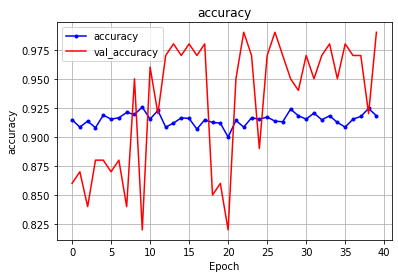

In [212]:
## 훈련의 accuracy를 그래프에 표시
# history -> accuracy
plt.title('accuracy')
plt.plot(r.history['accuracy'],'b', marker='.', label='accuracy')
plt.plot(r.history['val_accuracy'],'r', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [213]:
score = model.evaluate(X_test_std, Y_test_oh)

4/4 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9900
